# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
cities

['ribeira grande',
 'lebu',
 'ponta do sol',
 'avarua',
 'cidreira',
 'hobart',
 'mehamn',
 'halalo',
 'paita',
 'srednekolymsk',
 'dingle',
 'chumikan',
 'arinos',
 'waipawa',
 'tumannyy',
 'katima mulilo',
 'punta arenas',
 'ancud',
 'fazilka',
 'albany',
 'galgani',
 'mandurah',
 'jamestown',
 'saskylakh',
 'matola',
 'vaitupu',
 'puerto ayora',
 'attawapiskat',
 'kerki',
 'barrow',
 'tasiilaq',
 'nabire',
 'samusu',
 'hermanus',
 'mataura',
 'tuktoyaktuk',
 'bengkulu',
 'marsh harbour',
 'tobol',
 'chakia',
 'cherskiy',
 'mountain home',
 'kuche',
 'aksu',
 'sitka',
 'maceio',
 'sinnamary',
 'pevek',
 'port blair',
 'baiyin',
 'cape town',
 'mar del plata',
 'airai',
 'pangnirtung',
 'hilo',
 'freetown',
 'kulhudhuffushi',
 'taolanaro',
 'atuona',
 'rikitea',
 'bredasdorp',
 'peniche',
 'ushuaia',
 'karratha',
 'tiarei',
 'illoqqortoormiut',
 'new norfolk',
 'tacna',
 'mys shmidta',
 'saint-philippe',
 'neiafu',
 'nelson',
 'kapaa',
 'mogadishu',
 'bridlington',
 'cap malheureux',


In [5]:
# cities=cities_pd

In [6]:

cities_pd=pd.DataFrame({"City":cities})

In [7]:
cities_pd.head()

,City
0,ribeira grande
1,lebu
2,ponta do sol
3,avarua
4,cidreira


In [8]:
cities_pd.shape

(600, 1)

In [9]:
cities_pd.tail()

,City
595,yoichi
596,vezirkopru
597,kjollefjord
598,emmett
599,gorodishche


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
cities_pd["Cloudiness"] =""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,,,,,,,,
1,lebu,,,,,,,,
2,ponta do sol,,,,,,,,
3,avarua,,,,,,,,
4,cidreira,,,,,,,,


In [11]:
params = {"appid":weather_api_key}
base_url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []
params
for i, row in cities_pd.iterrows():
    params["q"] = {row['City']}
    response = requests.get(base_url, params=params).json()
    responses.append(response)
    

In [12]:
#responses

In [13]:
print("Beginning Data Retrieval")  
print("------------------------")         
for i,row in cities_pd.iterrows():  
    try:
        print(f"Processing Record {i} {responses[i]['id']} |{responses[i]['name']}")      
        cities_pd.loc[i,"Cloudiness"]=responses[i]["clouds"]["all"]
        cities_pd.loc[i,"Country"]=responses[i]["sys"]["country"]
        cities_pd.loc[i,"Date"]=responses[i]["dt"]
        cities_pd.loc[i,"Humidity"] = responses[i]["main"]["humidity"]
        cities_pd.loc[i,"Lat"] = responses[i]["coord"]["lat"]
        cities_pd.loc[i,"Lng"]= responses[i]["coord"]["lon"]
        cities_pd.loc[i,"Max Temp"] = responses[i]["main"]["temp_max"]
        cities_pd.loc[i,"Wind Speed"] = responses[i]["wind"]["speed"]
                
    except:
        print(f"City not found {row['City']}. Skipping ....")



Beginning Data Retrieval
------------------------
Processing Record 0 3372707 |Ribeira Grande
Processing Record 1 3883457 |Lebu
Processing Record 2 2264557 |Ponta do Sol
Processing Record 3 4035715 |Avarua
Processing Record 4 3466165 |Cidreira
Processing Record 5 2163355 |Hobart
Processing Record 6 778707 |Mehamn
City not found halalo. Skipping ....
Processing Record 8 3694112 |Paita
Processing Record 9 2121025 |Srednekolymsk
Processing Record 10 1714733 |Dingle
Processing Record 11 2025256 |Chumikan
Processing Record 12 3471522 |Arinos
Processing Record 13 2206874 |Waipawa
City not found tumannyy. Skipping ....
Processing Record 15 877178 |Katima Mulilo
Processing Record 16 3874787 |Punta Arenas
Processing Record 17 3899695 |Ancud
Processing Record 18 1271891 |Fazilka
Processing Record 19 5106841 |Albany
City not found galgani. Skipping ....
Processing Record 21 2067119 |Mandurah
Processing Record 22 5122534 |Jamestown
Processing Record 23 2017155 |Saskylakh
Processing Record 24 10398

Processing Record 247 605155 |Kiruna
Processing Record 248 6078372 |Moose Factory
Processing Record 249 336745 |Gewanē
Processing Record 250 2037375 |Fujin
Processing Record 251 2063036 |Port Lincoln
Processing Record 252 2396853 |Omboué
City not found haibowan. Skipping ....
Processing Record 254 4021858 |Guerrero Negro
Processing Record 255 1806466 |Guangyuan
City not found belushya guba. Skipping ....
Processing Record 257 5924351 |Clyde River
Processing Record 258 5225507 |Warwick
Processing Record 259 2136150 |Luganville
Processing Record 260 2014624 |Udachny
Processing Record 261 3515504 |Tizimín
Processing Record 262 3024534 |Cluny
Processing Record 263 3839307 |Rawson
Processing Record 264 3421982 |Maniitsoq
Processing Record 265 3404558 |Cabedelo
Processing Record 266 2656708 |Ayr
Processing Record 267 521966 |Nikolayevka
Processing Record 268 5354943 |Half Moon Bay
Processing Record 269 1223738 |Weligama
Processing Record 270 2636790 |Stornoway
City not found meyungs. Skippin

Processing Record 481 1269646 |Itimādpur
Processing Record 482 3415496 |Keflavik
Processing Record 483 2276492 |Harper
Processing Record 484 3414079 |Olafsvik
Processing Record 485 70979 |Sayyan
Processing Record 486 1528998 |Yumen
Processing Record 487 6690296 |Saint-Joseph
Processing Record 488 2082539 |Merauke
Processing Record 489 5601933 |Nampa
Processing Record 490 3385077 |Conde
Processing Record 491 3167751 |San Salvo
Processing Record 492 4956335 |Yarmouth
Processing Record 493 2312888 |Mbanza-Ngungu
Processing Record 494 3861953 |Chacabuco
Processing Record 495 101312 |Turaif
Processing Record 496 3347019 |Mossamedes
Processing Record 497 105298 |Jizan
Processing Record 498 6613142 |Vincennes
Processing Record 499 1688696 |San Policarpo
Processing Record 500 4013679 |Coahuayana Viejo
City not found wazzan. Skipping ....
Processing Record 502 2524170 |Messina
Processing Record 503 577240 |Dvinskoy Bereznik
Processing Record 504 1252795 |Yanam
Processing Record 505 1337620 |Fun

In [14]:
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,75,PT,1603747650,88,38.52,-28.7,294.15,8.2
1,lebu,100,CL,1603747650,72,-37.62,-73.65,285.53,4.03
2,ponta do sol,40,PT,1603747651,77,32.67,-17.1,292.15,5.7
3,avarua,100,CK,1603747652,69,-21.21,-159.78,297.15,6.2
4,cidreira,100,BR,1603747653,94,-30.18,-50.21,293.62,3.35


In [15]:
cities_pd.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
595,yoichi,75,JP,1603748033,100,43.2,140.77,279.15,1
596,vezirkopru,0,TR,1603748034,39,41.14,35.45,283.15,0.73
597,kjollefjord,0,NO,1603748034,83,70.95,27.35,273.15,6.7
598,emmett,87,US,1603747916,28,43.87,-116.5,280.37,2.37
599,gorodishche,0,RU,1603748034,86,48.8,44.47,277.15,2


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Export a csv File all the data 
cities_pd.to_csv('./Resources/cities.csv')
cities_pd.to_csv('../VacationPy/Resources/cities.csv')

In [17]:
#Format field Date
cities_pd.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

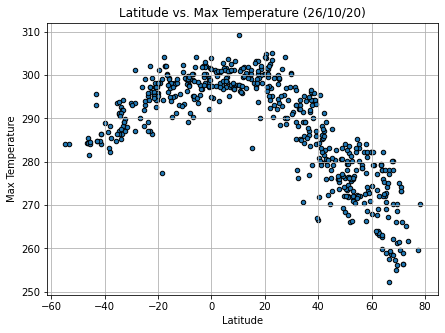

In [18]:
#Plot using Date as Title create a series of scatter plots to showcase the following relationships:
#Date current Date ?? (including date of analysis)    Save the plotted figures as .pngs.
DateChart=datetime.datetime.today().strftime('%d/%m/%y')
#DateChart
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"])
LatvsTemp=cities_pd.plot(kind="scatter", x="Lat",y="Max Temp",edgecolor="Black" ,figsize=(7,5))
LatvsTemp.set_title(f"Latitude vs. Max Temperature ({DateChart})")
LatvsTemp.set_xlabel("Latitude")
LatvsTemp.set_ylabel("Max Temperature")
LatvsTemp.grid()
LatvsTemp.figure.savefig("./Images/LatitudevsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

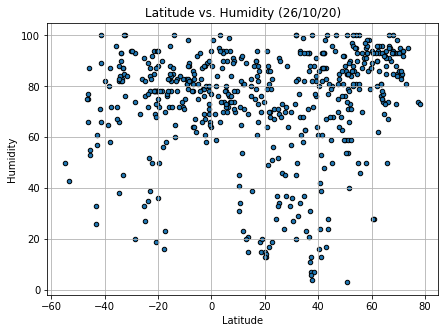

In [19]:
#Date current Date ?? (including date of analysis)   
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"])
LatvsHum=cities_pd.plot(kind="scatter", x="Lat",y="Humidity",edgecolor="Black" ,figsize=(7,5))
LatvsHum.set_title(f"Latitude vs. Humidity ({DateChart})")
LatvsHum.set_xlabel("Latitude")
LatvsHum.set_ylabel("Humidity")
LatvsHum.grid()
LatvsHum.figure.savefig("./Images/LatitudevsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

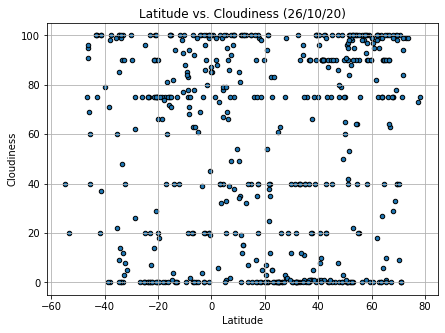

In [20]:
#Date current Date  (including date of analysis)
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"])
LatvsCloud=cities_pd.plot(kind="scatter", x="Lat",y="Cloudiness",edgecolor="Black" ,figsize=(7,5))
LatvsCloud.set_title(f"Latitude vs. Cloudiness ({DateChart})")
LatvsCloud.set_xlabel("Latitude")
LatvsCloud.set_ylabel("Cloudiness")
LatvsCloud.grid()
LatvsCloud.figure.savefig("./Images/LatitudevsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

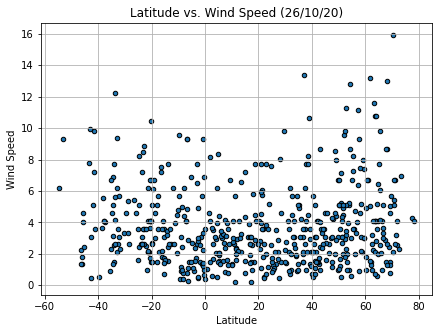

In [21]:
#Date current Date ?? (including date of analysis)
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"])
LatvsWind=cities_pd.plot(kind="scatter", x="Lat",y="Wind Speed",edgecolor="Black" ,figsize=(7,5))
LatvsWind.set_title(f"Latitude vs. Wind Speed ({DateChart})")
LatvsWind.set_xlabel("Latitude")
LatvsWind.set_ylabel("Wind Speed")
LatvsWind.grid()
LatvsWind.figure.savefig("./Images/LatitudevsWindSpeed.png")
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots ****checck   r value

# Define function for creating linear agression and scatter plot
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) =stats.linregress(x_values,y_values)
    regress_values =x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    #print(line_eq)
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    print(f" The r squared value is : {rvalue**2}")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')
    

In [23]:
# Create Northern and Southern Hemisphere DataFrames  ***check lat > 0  y long   Northern >0  Southern <0
#North
NorthernHemisphere=cities_pd.loc[cities_pd["Lat"] >= 0]
#len(NorthernHemisphere)
SouthernHemisphere=cities_pd.loc[cities_pd["Lat"] < 0]
#len(SouthernHemisphere)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r squared value is : 0.7792810591671031


Text(0, 0.5, 'Max Temp')

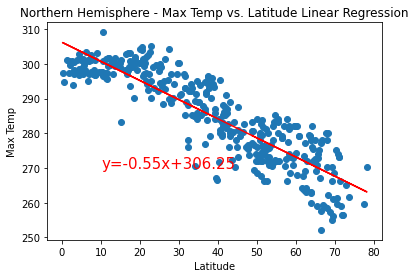

In [24]:
# Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Max Temp"])
# function to show line_eq
annotate(function,10,270)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r squared value is : 0.5545834570499019


Text(0, 0.5, 'Max Temp')

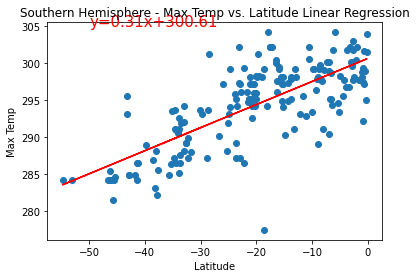

In [25]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Max Temp"])
# function to show line_eq
annotate(function,-50,305)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r squared value is : 0.05703488430305145


Text(0, 0.5, 'Humidity')

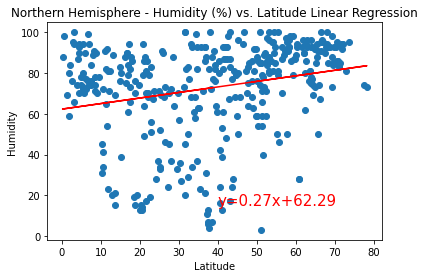

In [26]:
#Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Humidity"])
# function to show line_eq
annotate(function,40,15)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r squared value is : 0.02654906874516683


Text(0, 0.5, 'Humidity')

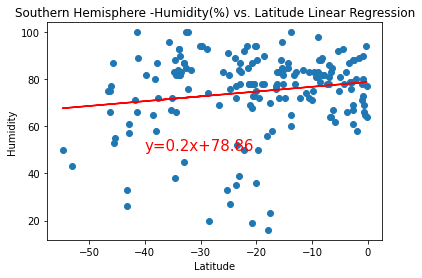

In [27]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Humidity"])
# function to show line_eq
annotate(function,-40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere -Humidity(%) vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r squared value is : 0.023152937854703775


Text(0, 0.5, 'Cloudiness')

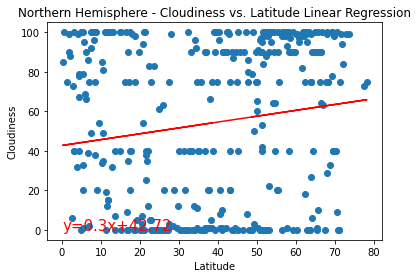

In [28]:
# Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Cloudiness"])
# function to show line_eq
annotate(function,0,0)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r squared value is : 2.310616706750071e-05


Text(0, 0.5, 'Cloudiness')

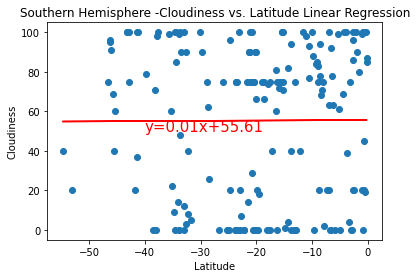

In [29]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Cloudiness"])
# function to show line_eq
annotate(function,-40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere -Cloudiness vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r squared value is : 0.056615928021006116


Text(0, 0.5, 'Wind Speed')

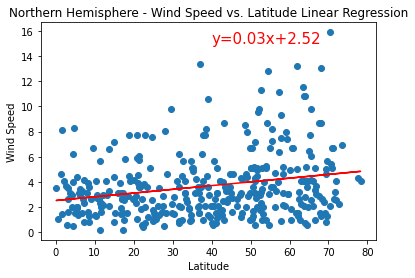

In [30]:
#Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Wind Speed"])
# function to show line_eq
annotate(function,40,15)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r squared value is : 0.043505992854467844


Text(0, 0.5, 'Wind Speed')

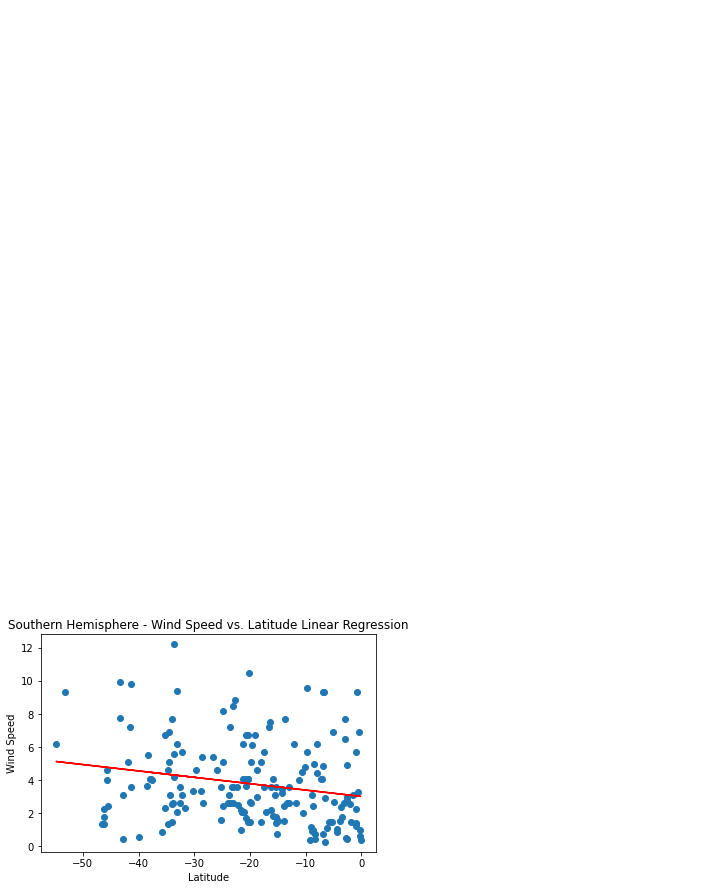

In [32]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Wind Speed"])
# function to show line_eq
annotate(function,40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed")

***************************************************************************************************